# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

615


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#API URL 
url="http://api.openweathermap.org/data/2.5/weather"
#Initial creation of API parameters
location=""
parameters= { 
              "q": location,
              "appid": api_key,
              "units": "imperial"
            }

#Name Dataframe columns
weather = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]

#Create empty data frame
cities_df=pd.DataFrame(columns=weather)



#reset counter
i=1

# find start time and start message
start_time=time.ctime()
print(f"Beginning Data Retrieval at {start_time}\n",     
      f"-----------------------------")

# Set up the chunking variables
batch_counter=0
batch_start=time.time()

#Loop to pull API data
for city in cities:
    #assign city to the API parameters
    parameters["q"]=city
    #Print Processessing, increment counter, and call API
    print(f"{int(i/len(cities)*100)}% Done. Processing record {i} of {len(cities)} | {city}")
    i+=1
    city_data=requests.get(url,params=parameters)
    #make sure there's a valid response
    if city_data.status_code == 200:
        #This try drops anything that has a null field so I don't have to later
        try:
            #Get the needed values from the API and add them to a dict
            city_json=city_data.json()
            cityname=city_json["name"] 
            cloudiness=city_json["clouds"]["all"] 
            country=city_json["sys"]["country"]
            epoch_time=city_json["dt"]        
            humidity=city_json["main"]["humidity"]     
            lat=city_json["coord"]["lat"]          
            lon=city_json["coord"]["lon"]           
            max_temp=city_json["main"]["temp_max"] 
            wind_speed=city_json["wind"]["speed"]
            city_dict={ "City": cityname, 
                        "Cloudiness": cloudiness, 
                        "Country": country, 
                        "Date": epoch_time, 
                        "Humidity":humidity, 
                        "Lat":lat, 
                        "Lng": lon, 
                        "Max Temp":max_temp, 
                        "Wind Speed":wind_speed}
            #Append the dict as a row to the dataframe
            cities_df=cities_df.append(city_dict, ignore_index=True)
        except:
            print(f"Data missing skipping {city}")
            
    else:
        print(f"City not found. error {city_data.status_code} Skipping...")



end_time=time.ctime()        
print(
    f"-----------------------------\n"
    f"Data Retrieval Complete at {end_time}\n"   
    f"-----------------------------\n"
    )

Beginning Data Retrieval at Sun Apr  7 22:59:28 2019
 -----------------------------
0% Done. Processing record 1 of 615 | rikitea
0% Done. Processing record 2 of 615 | provideniya
0% Done. Processing record 3 of 615 | ponta do sol
0% Done. Processing record 4 of 615 | leningradskiy
0% Done. Processing record 5 of 615 | emerald
0% Done. Processing record 6 of 615 | cape town
1% Done. Processing record 7 of 615 | raudeberg
1% Done. Processing record 8 of 615 | holstebro
1% Done. Processing record 9 of 615 | dikson
1% Done. Processing record 10 of 615 | saint-philippe
1% Done. Processing record 11 of 615 | tautira
1% Done. Processing record 12 of 615 | mataura
2% Done. Processing record 13 of 615 | mys shmidta
City not found. error 404 Skipping...
2% Done. Processing record 14 of 615 | ushuaia
2% Done. Processing record 15 of 615 | west wendover
2% Done. Processing record 16 of 615 | cidreira
2% Done. Processing record 17 of 615 | yellowknife
2% Done. Processing record 18 of 615 | sao fil

25% Done. Processing record 158 of 615 | revelstoke
25% Done. Processing record 159 of 615 | babu
26% Done. Processing record 160 of 615 | albertville
26% Done. Processing record 161 of 615 | taraz
26% Done. Processing record 162 of 615 | gap
26% Done. Processing record 163 of 615 | kazachinskoye
26% Done. Processing record 164 of 615 | ngukurr
City not found. error 404 Skipping...
26% Done. Processing record 165 of 615 | ust-omchug
26% Done. Processing record 166 of 615 | anloga
27% Done. Processing record 167 of 615 | booue
27% Done. Processing record 168 of 615 | muzhi
27% Done. Processing record 169 of 615 | seymchan
27% Done. Processing record 170 of 615 | smolenskoye
27% Done. Processing record 171 of 615 | iquitos
27% Done. Processing record 172 of 615 | aloleng
28% Done. Processing record 173 of 615 | axim
28% Done. Processing record 174 of 615 | severo-kurilsk
28% Done. Processing record 175 of 615 | svetlogorsk
28% Done. Processing record 176 of 615 | qasigiannguit
28% Done. 

51% Done. Processing record 314 of 615 | the valley
51% Done. Processing record 315 of 615 | bonavista
51% Done. Processing record 316 of 615 | lodwar
51% Done. Processing record 317 of 615 | iwanai
51% Done. Processing record 318 of 615 | lethem
51% Done. Processing record 319 of 615 | saint george
52% Done. Processing record 320 of 615 | ilulissat
52% Done. Processing record 321 of 615 | guerrero negro
52% Done. Processing record 322 of 615 | grand river south east
City not found. error 404 Skipping...
52% Done. Processing record 323 of 615 | muzaffargarh
52% Done. Processing record 324 of 615 | deputatskiy
52% Done. Processing record 325 of 615 | marcona
City not found. error 404 Skipping...
53% Done. Processing record 326 of 615 | prince rupert
53% Done. Processing record 327 of 615 | killybegs
53% Done. Processing record 328 of 615 | umm kaddadah
53% Done. Processing record 329 of 615 | nicoya
53% Done. Processing record 330 of 615 | tuatapere
53% Done. Processing record 331 of 61

75% Done. Processing record 466 of 615 | burns lake
75% Done. Processing record 467 of 615 | tyrma
76% Done. Processing record 468 of 615 | imbituba
76% Done. Processing record 469 of 615 | ulladulla
76% Done. Processing record 470 of 615 | rodrigues alves
76% Done. Processing record 471 of 615 | bernay
76% Done. Processing record 472 of 615 | marfino
76% Done. Processing record 473 of 615 | wanning
77% Done. Processing record 474 of 615 | de aar
77% Done. Processing record 475 of 615 | iqaluit
77% Done. Processing record 476 of 615 | fort nelson
77% Done. Processing record 477 of 615 | porto empedocle
77% Done. Processing record 478 of 615 | isangel
77% Done. Processing record 479 of 615 | richards bay
78% Done. Processing record 480 of 615 | karratha
78% Done. Processing record 481 of 615 | kologriv
78% Done. Processing record 482 of 615 | north platte
78% Done. Processing record 483 of 615 | magnitka
78% Done. Processing record 484 of 615 | vite
78% Done. Processing record 485 of 61

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
cities_df.to_csv("city_data.csv")

cities_df.head(10)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,8,PF,1554691947,100,-23.12,-134.97,77.22,5.73
1,Provideniya,40,RU,1554690600,61,64.42,-173.23,17.60,15.66
2,Ponta do Sol,92,BR,1554691956,96,-20.63,-46.00,66.60,2.37
3,Leningradskiy,8,RU,1554692177,97,69.38,178.42,4.32,3.38
4,Emerald,0,AU,1554691681,48,-23.53,148.16,82.99,8.05
5,Cape Town,75,ZA,1554691928,93,-33.93,18.42,57.99,11.41
6,Raudeberg,0,NO,1554692104,44,61.99,5.14,37.99,6.93
7,Holstebro,0,DK,1554692105,86,56.36,8.62,42.01,6.93
8,Dikson,44,RU,1554691950,100,73.51,80.55,15.03,8.75
9,Saint-Philippe,90,CA,1554692038,61,45.36,-73.48,46.40,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

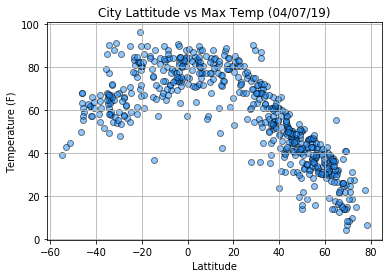

In [10]:
#Funtion to add labels and formatting
def plot_format(title, y_label, timestamp ):
    date=time.strftime("%m/%d/%y",time.localtime(timestamp))
    plt.xlabel("Lattitude")
    plt.ylabel(y_label)
    plt.title(f"{title} ({date})")
    plt.grid(b=True)


# date on  graph
graph_date=cities_df["Date"][0]




plt.scatter(cities_df["Lat"], cities_df["Max Temp"], color="DodgerBlue", alpha=.5, edgecolors="black")

plot_format("City Lattitude vs Max Temp","Temperature (F)",graph_date)

plt.savefig('../Images/Lat vs. Temp.png')

plt.show()

#### Latitude vs. Humidity Plot

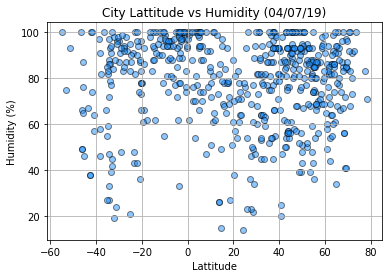

In [12]:


# Plot the graph

plt.scatter(cities_df["Lat"], cities_df["Humidity"], color="DodgerBlue", alpha=.5, edgecolors="black")

# Format the graph
plot_format("City Lattitude vs Humidity","Humidity (%)",graph_date)

plt.savefig('../Images/Lat vs. Humidity.png')

plt.show()

#### Latitude vs. Cloudiness Plot

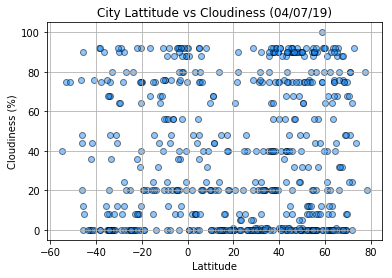

In [13]:
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], color="DodgerBlue", alpha=.5, edgecolors="black")
#format the graph
plot_format("City Lattitude vs Cloudiness","Cloudiness (%)",graph_date)

plt.savefig('../Images/Lat vs. Cloudiness.png')
plt.show()


#### Latitude vs. Wind Speed Plot

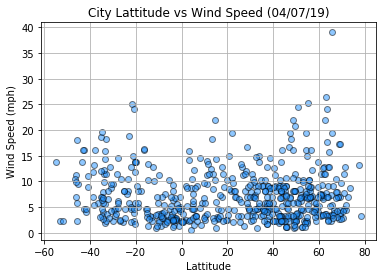

In [14]:

#plot the graph
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], color="DodgerBlue", alpha=.5, edgecolors="black")
#format the graph
plot_format("City Lattitude vs Wind Speed","Wind Speed (mph)",graph_date)

plt.savefig('../Images/Lat vs. Wind Speed.png')
plt.show()

# Observations:

### Max temperature increases as you approach the equator.
### Latitude does not affect humidity
### Latitude does not affect cloudiness